In [8]:
import csv
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [6]:
%matplotlib inline

sns.set_style("darkgrid")

In [10]:
dataset_dir = Path.cwd() / ".." / "datasets"

In [79]:
df = None

with open(dataset_dir/"inegi"/"crimen"/"IDEFC_NM_abr24.csv", encoding="latin") as fp:
    df = pandas.read_csv(fp)

df.drop(columns=["Clave_Ent"], inplace=True)
df.head()

,Año,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Are there null columns in the dataset ?
df.isnull().sum()

Año                          0
Entidad                      0
Bien jurídico afectado       0
Tipo de delito               0
Subtipo de delito            0
Modalidad                    0
Enero                        0
Febrero                      0
Marzo                        0
Abril                        0
Mayo                      3136
Junio                     3136
Julio                     3136
Agosto                    3136
Septiembre                3136
Octubre                   3136
Noviembre                 3136
Diciembre                 3136
dtype: int64

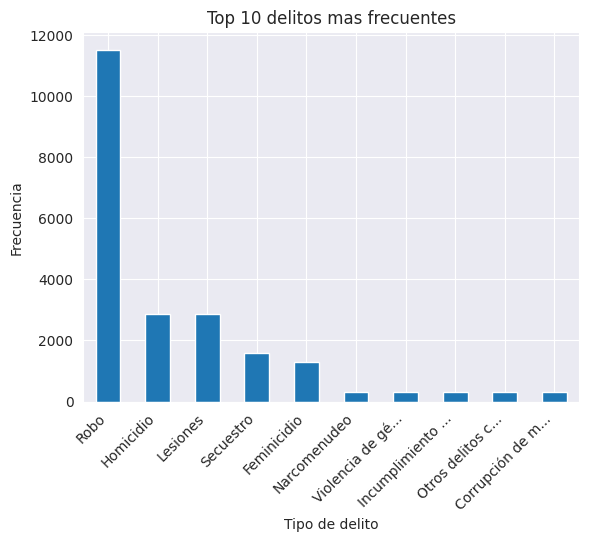

In [81]:
# Visualize some of the most frequent crimes in Mexico

plt.title("Top 10 delitos mas frecuentes")
plt.ylabel("Frecuencia")
plt.xlabel("Tipo de delito")

top10crimes = df["Tipo de delito"].value_counts().head(10)
ax = top10crimes.plot.bar()

plt.xticks(rotation=45, ha='right', fontsize=10)

# Labels that are too long are 'shrinked' and an ellipsis is added
max_label_length = 15
new_labels = [label if len(label) <= max_label_length else label[:max_label_length] + '...' for label in top10crimes.index]
ax.set_xticklabels(new_labels)

plt.show()

In [85]:
# Group by year and sum all the numeric values to find out how many incidents have been reported by year per month
yearly_crime_df_grouped = df.groupby("Año")

yearly_crime_df = yearly_crime_df_grouped.sum(numeric_only=True)

yearly_crime_df.head()

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Año,,,,,,,,,,,,
2015,129151,130311,141273,137645,141518.0,142407.0,139820.0,139416.0,141186.0,145745.0,138634.0,130698.0
2016,128737,139460,146412,150822,154217.0,152420.0,144146.0,149893.0,150819.0,151895.0,146434.0,148924.0
2017,152166,144229,167083,151967,171160.0,170686.0,161274.0,172888.0,161369.0,174029.0,163238.0,149406.0
2018,156427,153612,169011,169496,177359.0,166283.0,169207.0,173662.0,164754.0,177250.0,160465.0,152400.0
2019,162943,161840,176328,172623,185803.0,176051.0,180300.0,179216.0,171040.0,182054.0,164703.0,158278.0


<Axes: >

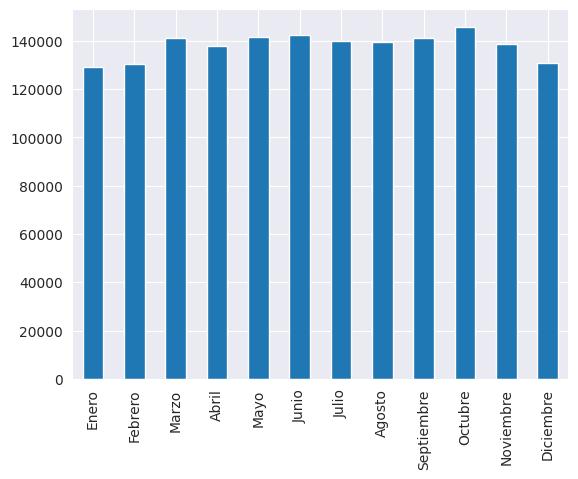

In [104]:
yearly_crime_df.T[2015].plot.bar()